Лабораторна робота №6

Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).

In [10]:
import tensorflow as tf

# 1. Створення тензорів (набір даних)
scalar = tf.constant(5)  # Скаляр
vector = tf.constant([1, 2, 3, 4])  # Вектор
matrix = tf.constant([[1, 2], [3, 4], [5, 6]])  # Матриця

# Виведення створених тензорів
print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)

# 2. Операції Create, Read, Update, Delete (CRUD)

# Read (читання значень тензорів)
scalar_value = scalar.numpy()
vector_value = vector.numpy()
matrix_value = matrix.numpy()
print("\nRead values:")
print("Scalar value:", scalar_value)
print("Vector value:", vector_value)
print("Matrix value:\n", matrix_value)

# Update (оновлення даних у тензорі)
# TensorFlow тензори незмінні, тому створюємо нові тензори
updated_scalar = scalar + 10
updated_vector = vector * 2
updated_matrix = matrix - 1

print("\nUpdated values:")
print("Updated Scalar:", updated_scalar)
print("Updated Vector:", updated_vector)
print("Updated Matrix:\n", updated_matrix)

# Delete (видалення тензора)
# У TensorFlow немає прямої операції "видалення", але ми можемо видалити посилання на об'єкт
# У Python це виконується за допомогою del

del scalar, vector, matrix  # Видалення об'єктів із пам'яті
print("\nTensors deleted from memory (references removed).")

# Create (створення нового тензора на основі існуючих даних)
new_tensor = tf.concat([updated_vector, tf.constant([10, 20])], axis=0)
print("\nNew Tensor (concatenated):", new_tensor)


Scalar: tf.Tensor(5, shape=(), dtype=int32)
Vector: tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
Matrix: tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)

Read values:
Scalar value: 5
Vector value: [1 2 3 4]
Matrix value:
 [[1 2]
 [3 4]
 [5 6]]

Updated values:
Updated Scalar: tf.Tensor(15, shape=(), dtype=int32)
Updated Vector: tf.Tensor([2 4 6 8], shape=(4,), dtype=int32)
Updated Matrix:
 tf.Tensor(
[[0 1]
 [2 3]
 [4 5]], shape=(3, 2), dtype=int32)

Tensors deleted from memory (references removed).

New Tensor (concatenated): tf.Tensor([ 2  4  6  8 10 20], shape=(6,), dtype=int32)


 Згенерувати набір даних для регресії та класифікації з використанням TensorFlow

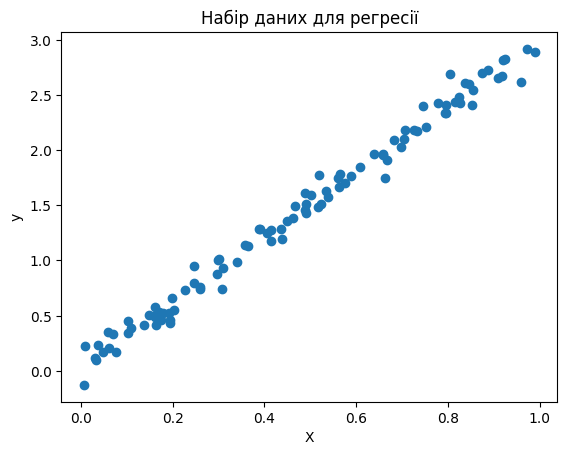

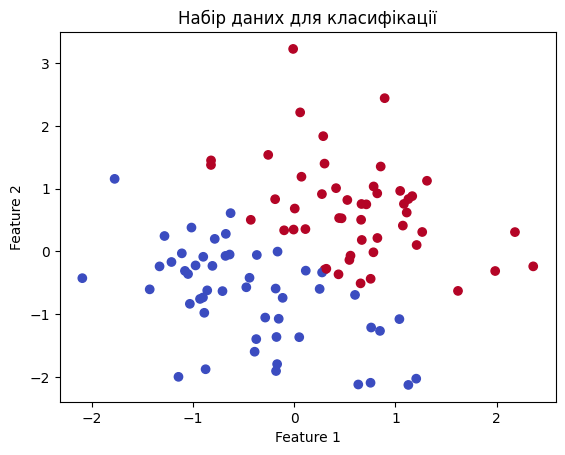

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Набір даних для регресії
def generate_regression_data(n_samples=100):
    X_reg = np.random.rand(n_samples, 1)  # Випадкові числа як вхід
    y_reg = 3 * X_reg + np.random.randn(n_samples, 1) * 0.1  # Лінійна залежність з шумом
    return X_reg, y_reg

X_reg, y_reg = generate_regression_data()

# Візуалізація даних для регресії
plt.scatter(X_reg, y_reg)
plt.title('Набір даних для регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Набір даних для класифікації
def generate_classification_data(n_samples=100):
    X_class = np.random.randn(n_samples, 2)  # Двовимірні точки
    y_class = (X_class[:, 0] + X_class[:, 1] > 0).astype(int)  # Просте правило класифікації
    return X_class, y_class

X_class, y_class = generate_classification_data()

# Візуалізація даних для класифікації
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='coolwarm')
plt.title('Набір даних для класифікації')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Здійснити графічний аналіз наборів даних за допомогою Matplotlib

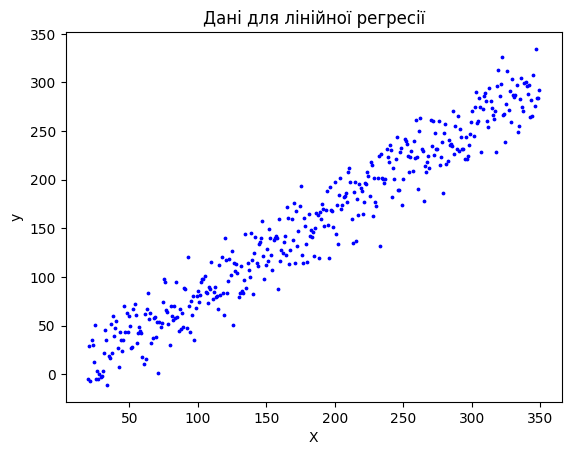

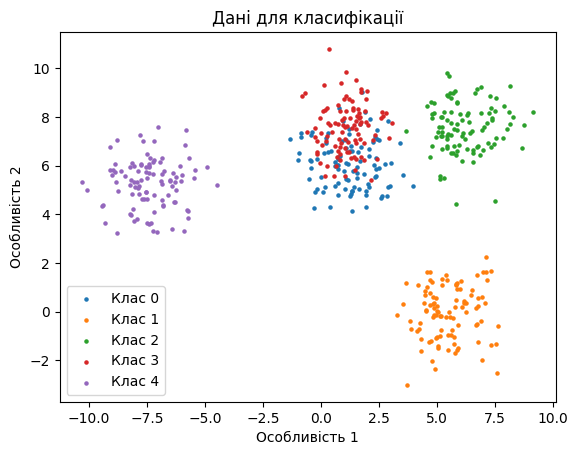

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

# Функція для генерації набору даних для регресії
def regression_dataset(samples, start_pt, end_pt, err):
    X = tf.constant(np.arange(start_pt[0], end_pt[0], (end_pt[0] - start_pt[0]) / samples))
    y_pred = np.arange(start_pt[1], end_pt[1], (end_pt[1] - start_pt[1]) / samples)
    y = tf.constant(y_pred + np.random.randn(samples) * err)
    return X, y

# Функція для генерації набору даних для класифікації
def classification_dataset(n_samples=100, n_features=2, n_classes=3):
    X = []
    y = []
    samples_per_class = n_samples // n_classes
    remainder = n_samples % n_classes
    
    # Генеруємо кластер для кожного класу
    for i in range(n_classes):
        center = np.random.randn(n_features) * 5
        if i == n_classes - 1:
            samples_per_class += remainder
        data = np.random.randn(samples_per_class, n_features)
        X.extend(center + data)
        y.extend(np.full(samples_per_class, i))
    
    return np.array(X), np.array(y)

# Генерація і візуалізація даних для регресії
X, y = regression_dataset(400, (20, 10), (350, 300), 20)
plt.scatter(X, y, color='blue', s=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Дані для лінійної регресії')
plt.show()

# Генерація і візуалізація даних для класифікації
X, y = classification_dataset(500, 2, 5)
for class_value in np.unique(y):
    class_data = X[y == class_value]
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Клас {class_value}', s=5)
plt.title('Дані для класифікації')
plt.xlabel("Особливість 1")
plt.ylabel("Особливість 2")
plt.legend()
plt.show()